<a href="https://colab.research.google.com/github/GODxFATHER/Airbnb-Bookings-Analysis-/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopy.distance

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import CSV file
path = '/content/drive/MyDrive/DATA_FILES/Airbnb_NYC_2019.csv'

#loading DF
df1 = pd.read_csv(path)

df = df1.copy()

1. who made most monet(HOW)
2. who made less money(WHY)
3. which host is most favourite by costomer(why)
4. 
5.


 

 

In [4]:
#take a look top 5 rows

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#take a look bottom 5  rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.isnull().sum(axis = 0) 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Droping NaN values from column 'name'  and 'host_name'.

Not droping 'last_review' and 'review' from DataFrame bcause 
*   Reviews are written by customers and didn't write and be sore     other error like not get up loaded 
*   It will make dataset short which later effect my other analys.


 

In [8]:
#just checking value of 'name' column with NaN value
df[ df['name'].isnull()] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


In [9]:
df.index[ df['name'].isnull()]

Int64Index([ 2854,  3703,  5775,  5975,  6269,  6567,  6605,  8841, 11963,
            12824, 13059, 13401, 15819, 16071, 18047, 28889],
           dtype='int64')

In [10]:
#giving value NaN value in 'name' column 
#value = unknown and  
df['name'][ df['name'].isnull()]  = df['id'].apply(lambda x: 'unknown'+str(x))
df[ df['name'].isnull()] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [11]:
null_host_name_index = df.index[ df['host_name'].isnull()]
null_host_name_index

Int64Index([  360,  2700,  5745,  6075,  6582,  8163,  8257,  8852,  9138,
             9817, 14040, 14631, 15174, 19565, 27777, 27962, 28042, 28274,
            30570, 32193, 38992],
           dtype='int64')

In [12]:
df[ df['host_name'].isnull()] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [13]:
df['host_name'][ df['host_name'].isnull()] = df.id.apply(lambda x: 'host_name'+'_'+str(x))
df.iloc[null_host_name_index].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,host_name_100184,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,host_name_1449546,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,host_name_4183989,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,host_name_4446862,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,host_name_4763327,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0


In [14]:
len(df.id.unique())

48895

In [15]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [16]:
print('id\n\n',df['id'].duplicated().value_counts())

print('\n\nname\n\n',df['name'].duplicated().value_counts())

print('\n\nhost_id\n\n',df['host_id'].duplicated().value_counts())

print('\n\nhost_name\n\n',df['host_name'].duplicated().value_counts())

id

 False    48895
Name: id, dtype: int64


name

 False    47921
True       974
Name: name, dtype: int64


host_id

 False    37457
True     11438
Name: host_id, dtype: int64


host_name

 True     37422
False    11473
Name: host_name, dtype: int64


In [17]:
df[['host_id','host_name']].duplicated().value_counts()

False    37460
True     11435
dtype: int64

In [18]:
f = df['host_name'][df[['host_name','host_id']].duplicated()].unique()  #sort_values(by=['host_name'])
len(f)

2942

In [19]:
f = df['host_id'][df[['host_name','host_id']].duplicated()].unique()  #sort_values(by=['host_name'])
len(f)

5152

In [20]:
f = df['name'][df['name'].duplicated()].unique()  #sort_values(by=['host_name'])
len(f)

645

In [21]:

df[df['name'] == f[11]].sort_values(by = ['last_review'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2105,958444,Great 1BD waterfront City Island NY,5214644,Noelva,Bronx,City Island,40.85235,-73.78873,Entire home/apt,84,3,67,2018-06-10,0.91,1,0
3245,1936633,Great 1BD waterfront City Island NY,10018391,Alex,Bronx,City Island,40.85258,-73.78762,Entire home/apt,120,3,84,2018-12-01,1.26,1,16


In [22]:
print('\n\n coordinates \n\n',df[['latitude','longitude']].duplicated().value_counts())



 coordinates 

 False    48871
True        24
dtype: int64


In [23]:
f[1]

'Superior @ Box House'

In [24]:
i=1
temp_df = df[df['name'] == f[i]].sort_values(by = ['last_review'])
display(temp_df)
dist_temo_df = temp_df[['latitude','longitude']].reset_index(drop=True)
cord =  dist_temo_df.to_numpy()
print('')
print('')
print(geopy.distance.vincenty(cord[0], cord[1]).km)
 
if cord[2]!=[]:
  print(geopy.distance.vincenty(cord[1], cord[2]).km)
elif cord[3]!=[]:
  print(geopy.distance.vincenty(cord[2], cord[3]).km)
else:
  print('over')
 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
682,253846,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73731,-73.95450,Private room,179,3,4,2015-12-04,0.05,28,81
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
321,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73749,-73.95292,Private room,179,3,36,2019-07-01,0.36,28,79




0.10261291216449166
0.11168778911324714


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


In [25]:
df[df.host_name == 'The Box House Hotel']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
321,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73749,-73.95292,Private room,179,3,36,2019-07-01,0.36,28,79
327,80684,Duplex w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73776,-73.95327,Private room,349,3,8,2016-03-27,0.09,28,60
328,80700,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73738,-73.95482,Private room,349,3,7,2019-05-24,0.07,28,60
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,2019-06-27,0.14,28,81
365,103311,2 BR w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73861,-73.95485,Private room,599,3,9,2018-05-19,0.09,28,60
652,248865,Loft Suite @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73787,-73.95385,Entire home/apt,199,3,34,2019-04-22,0.37,28,60
668,253466,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73693,-73.95284,Entire home/apt,199,3,33,2019-06-24,0.47,28,60
669,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,2018-11-06,0.32,28,84
670,253475,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73794,-73.95254,Entire home/apt,199,3,59,2019-06-24,0.66,28,60


In [26]:
coords_1 = (40.73867,	-73.95448)
coords_2 = (40.73844,	-73.95456	)

print(geopy.distance.vincenty(cord[0], cord[1]).km)

0.10261291216449166


In [27]:
import geopy.distance

coords_1 = (	40.85235,-73.78873	)
coords_2 = (40.85258	,-73.78762	)

print(geopy.distance.vincenty(coords_1, coords_2).km)

0.09702043019790046


there small change in latitude and longitude (why)
[This](https://www.thoughtco.com/difference-between-latitude-and-longitude-4070791#:~:text=Coordinates%20are%20often%20expressed%20as%20two%20sets%20of,the%20Empire%20State%20Building%20lies%20at%2040.748440%C2%B0%2C%20-73.984559%C2%B0.) will tell you

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# ***realtion between***
*   

*   last_review   
*   reviews_per_month
*   availability_365                



In [29]:
df[['last_review','reviews_per_month','availability_365']][df['availability_365'] == 0 ].isna().sum()

last_review          4845
reviews_per_month    4845
availability_365        0
dtype: int64

In [30]:
df[['last_review','reviews_per_month','availability_365']][df['availability_365'] == 0 ].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17533 entries, 4 to 48779
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   last_review        12688 non-null  object 
 1   reviews_per_month  12688 non-null  float64
 2   availability_365   17533 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 547.9+ KB


In [31]:
df.reviews_per_month = df.reviews_per_month.replace(np.nan,0)

In [32]:
df.reviews_per_month = df.number_of_reviews.replace(np.nan,0)

In [33]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,629.000000,327.000000,365.000000


In [34]:
df['last_review'].isna()

0        False
1        False
2         True
3        False
4        False
         ...  
48890     True
48891     True
48892     True
48893     True
48894     True
Name: last_review, Length: 48895, dtype: bool

In [37]:
# What can we learn about different hosts and areas?
# What can we learn from predictions? (ex: locations, prices, reviews, etc)
# Which hosts are the busiest and why?
# Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [38]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,9,1,0


In [39]:
#droping null value from NAME and HOST_NAME 
df_no_null = df.dropna(axis = 0 , subset=['name','host_name'] )
df_no_null.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,9,1,0


In [40]:
df_no_null['last_review'] = df_no_null['last_review'].astype('datetime64[ns]')

In [41]:
df_no_null['year'] = df_no_null['last_review'][df_no_null['last_review'].notna()].apply(lambda x: x.year)
df_no_null['month'] = df_no_null['last_review'][df_no_null['last_review'].notna()].apply(lambda x: x.month)
df_no_null['year'] = df_no_null['year'].astype('Int64')
df_no_null['month'] = df_no_null['month'].astype('Int64')
 

In [42]:
df_no_null['total_cost'] = df_no_null['price']  * (365 -df_no_null['availability_365'] )

# What can we learn about different hosts and areas?

In [43]:
df_no_null.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,total_cost
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,9,6,365,2018,10,0


In [44]:
df_no_null.groupby(['host_id','neighbourhood']).sum('total_cost').sort_values(by = 'price',ascending=False).head(5)

,,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,total_cost
host_id,neighbourhood,,,,,,,,,,,,
219517861,Financial District,7243034001,8874.12354,-16134.19302,57738,1786,1129,1129,71286,68225,343230,983,3384291
205031545,Midtown,1415225676,1996.92821,-3624.34656,35294,750,127,127,2401,10796,68643,163,5195611
3750764,Chelsea,146476143,244.49844,-444.02590,18780,6,0,0,36,1456,0,0,965180
836168,Upper West Side,50490959,367.01475,-665.82571,15000,270,227,227,99,2914,18146,48,739000
1177497,Clinton Hill,50161458,447.59267,-813.63698,14850,11,595,595,121,3997,22204,72,4740


In [45]:
df_no_null[df_no_null['host_id'] == 219517861]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,total_cost
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaT,0,327,309,<NA>,<NA>,16912
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,1,327,219,2019,5,33434
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,1,327,159,2019,5,47792
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,8,327,91,2019,6,71788
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,14,327,81,2019,6,72420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaT,0,327,339,<NA>,<NA>,3510
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaT,0,327,342,<NA>,<NA>,3795
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaT,0,327,347,<NA>,<NA>,2970
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaT,0,327,327,<NA>,<NA>,26562


In [46]:
df_no_null[['name','neighbourhood','host_name','host_id','total_cost']].groupby(['neighbourhood','host_id']).sum('total_cost').sort_values(by = 'total_cost',ascending=True).head(5)

,,total_cost
neighbourhood,host_id,
Upper East Side,50770601,0
Bushwick,40611169,0
Boerum Hill,27742760,0
Harlem,10609846,0
Sunset Park,6457253,0


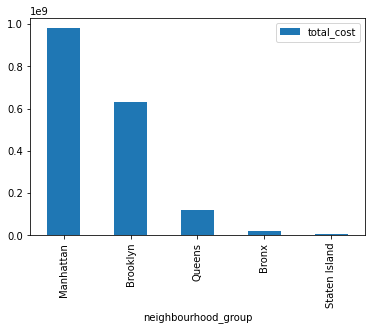

In [47]:
#which neighbourhood_group make most money 
df_no_null[['neighbourhood_group','total_cost']].groupby(['neighbourhood_group']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(5).plot(kind = 'bar')

In [48]:
df_no_null[['neighbourhood','total_cost']].groupby(['neighbourhood']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(20) 

,total_cost
neighbourhood,
Williamsburg,153054916
Upper West Side,102616402
East Village,94245896
Bedford-Stuyvesant,93068424
Hell's Kitchen,85436299
Upper East Side,80349413
Midtown,80140635
Harlem,76500583
Chelsea,63447969


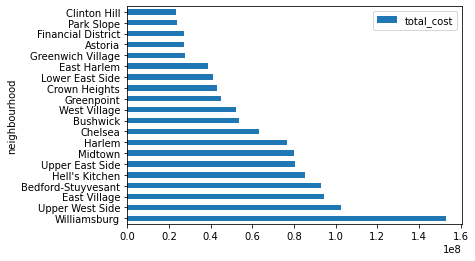

In [49]:
#which neighbourhood  make most money 
df_no_null[['neighbourhood','total_cost']].groupby(['neighbourhood']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(20).plot(kind = 'barh')
plt.rcParams["figure.figsize"] = (12,9)


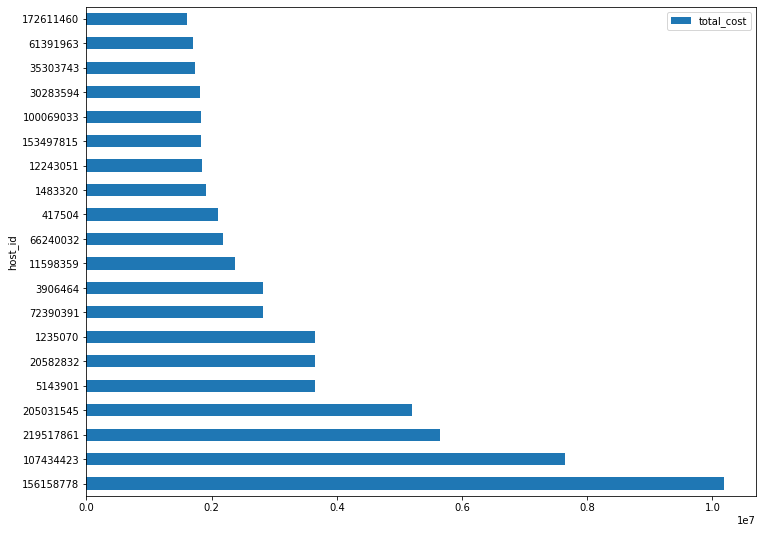

In [50]:
#which host_id  make most money 
df_no_null[['host_id','total_cost']].groupby(['host_id']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(20).plot(kind = 'barh')
plt.rcParams["figure.figsize"] = (12,9)

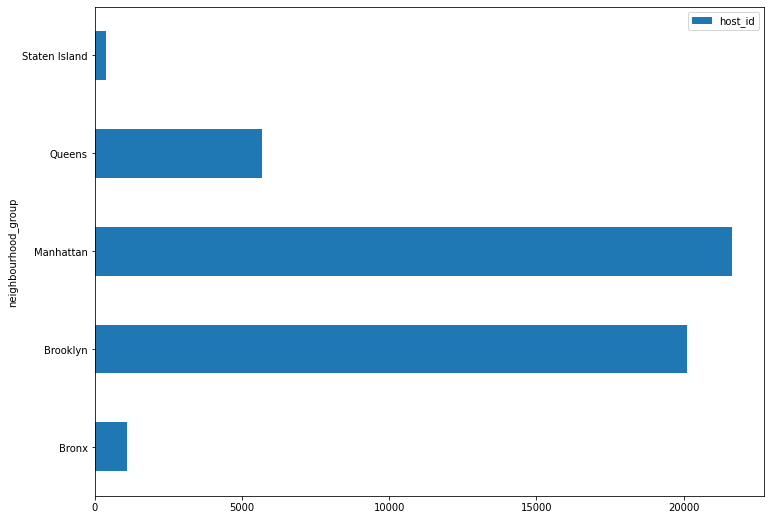

In [51]:
df_no_null[['neighbourhood_group','host_id']].groupby('neighbourhood_group').count().plot(kind = 'barh')

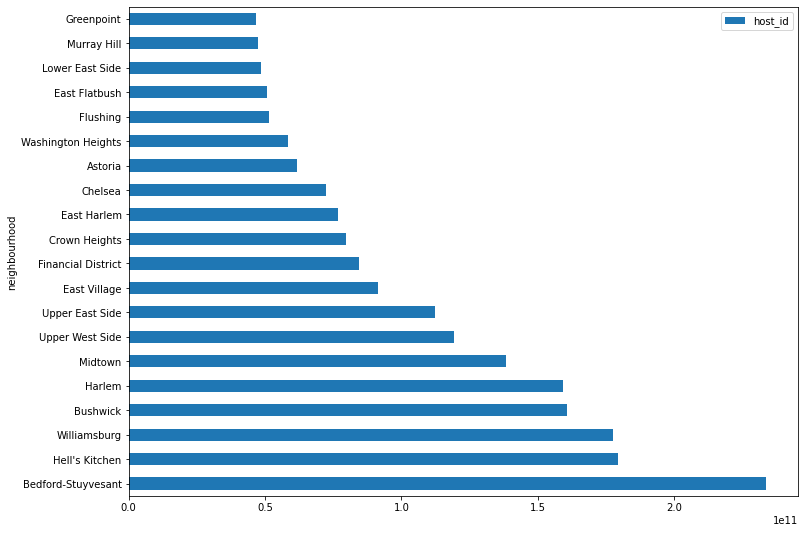

In [52]:
 df_no_null[['neighbourhood','host_id']].groupby('neighbourhood').sum('host_id').sort_values(by = 'host_id',ascending=False).head(20).plot(kind = 'barh')